Group 12- Final Project

Group Members:
Tin Bien,
Kristina Gutierrez-Arana

# Introduction
We chose to analyze a dataset about heart disease mostly because the collected data was very clean. We also thought the conclusions we would be able to draw after our analysis would be valuable information to know. Heart failure impacts many people so it is best to be informed about it. Below are some of the questions we posed about our dataset:

Main Questions:

1. What age is most common amongst the patients?  
2. Is there a common illness amongst those who experience heart failure? 
3. Do platelets have any outliers?
4. Is heart failure more common in men or women or neither?
5. Among the patients, what is the common age of death due to heart failure?
6. Is there a level of 'Creatinine Phosphokinase' that causes (or more likely causes) death?
7. Which attribute(s) have the highest correlation with heart failure? 


## Description of data
We accessed this data set through www.kaggle.com, using methods such as Pandas in the code in order to extract information from the .csv file.

Source: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


This dataset includes information about patients with cardiovascular disease (heart failure). The different attributes tell you about the patients lifestyle (i.e if they smoke, if they have diabetes or high blood pressure etc.) and whether or not they have died of said cardiovascular disease. Given this information, this data can be used to predict heart failure. The data collected is from BMC Medical Informatics and Decision Making 20, 16 (2020).

## Analysis of the data
As mentioned in the proposal, the dataset we chose is very clean so we did not have to do any pre-processing or cleaning. Most importantly, there are no null values, which is demonstrated below:

In [ ]:
#This portion of the code is used to load the dataset

#We imported a lot of librabries in case we needed, but most of it is unused.
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
import seaborn as sns


def get_data(file):

    data = []

    with open(file, 'r', encoding="utf8") as f:
        for l in csv.DictReader(f):
            data.append(l)
    
    return data

heart_failure = get_data('heart_failure_clinical_records_dataset.csv')




In [ ]:
#Created a DataFrame
df = pd.DataFrame(heart_failure)
display(df)

#A big issue with this dataset is our own lack of expertise in the field of medical studies,
#meaning some research of the content was necessary in order to better understand the dataset.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000,1.4,140,1,1,280,0


In [ ]:
#Using describe() to quickly check basic information.
display(df.describe(include='all')) # from here we can see that there are no null values in our dataset

###If you only see 4 rows, run it again to see all of the output

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299,299,299,299,299,299,299,299,299,299,299,299,299
unique,47,2,208,2,17,2,176,40,27,2,2,148,2
top,60,0,582,0,35,0,263358.03,1,136,1,0,250,0
freq,33,170,47,174,49,194,25,50,40,194,203,7,203


In [ ]:
#Using .info() for different but also basic information.
display(df.info())
#The fact that each column was of object/string type is mostly likely the fault of me not using pandas' "read_csv" function.
#Not sure if it would make a difference though (since I haven't used it).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       299 non-null    object
 1   anaemia                   299 non-null    object
 2   creatinine_phosphokinase  299 non-null    object
 3   diabetes                  299 non-null    object
 4   ejection_fraction         299 non-null    object
 5   high_blood_pressure       299 non-null    object
 6   platelets                 299 non-null    object
 7   serum_creatinine          299 non-null    object
 8   serum_sodium              299 non-null    object
 9   sex                       299 non-null    object
 10  smoking                   299 non-null    object
 11  time                      299 non-null    object
 12  DEATH_EVENT               299 non-null    object
dtypes: object(13)
memory usage: 30.5+ KB


None

As seen from above, there are no null values as well as many data that may or may not be interesting and useful to both you and us.


## Exploratory Data Analysis

### What age is most common amongst the patients?

<AxesSubplot:>

Text(0, 0.5, 'Number of Patients')

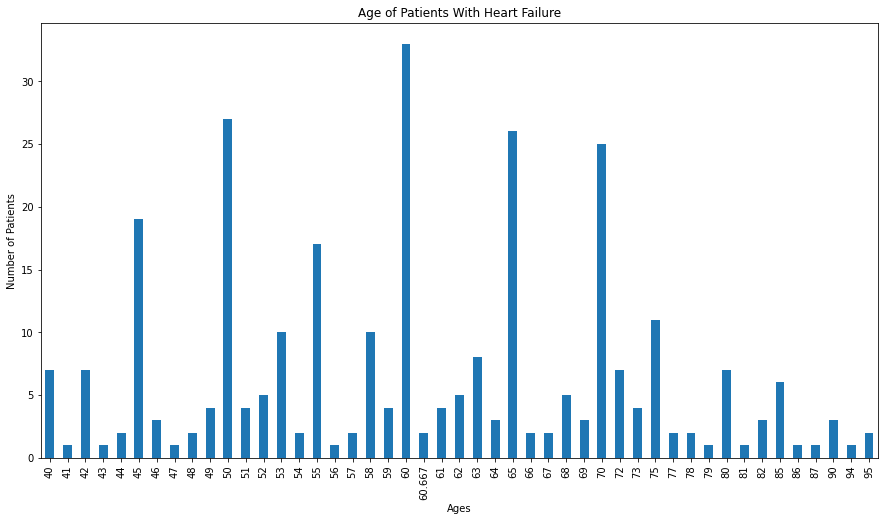

In [ ]:
#Sorting and storing in df_age for easier usage and easier readability on the graph
df_age = df['age'].value_counts().sort_index()

#Using display will make notebook display things as beatifully as print() does or more.
display(df_age.plot.bar(figsize=(15,8))) #enlarges plot
plt.title("Age of Patients With Heart Failure")
plt.xlabel("Ages")
plt.ylabel("Number of Patients")


There is an age that doesn't make sense (60.667). To deal with this issue, we will be converting the data type of these values to int and recalculating the number of ages (casting to int does not round the number so we have to convert to float and then round, before converting to int).

<AxesSubplot:>

Text(0, 0.5, 'Number of Patients')

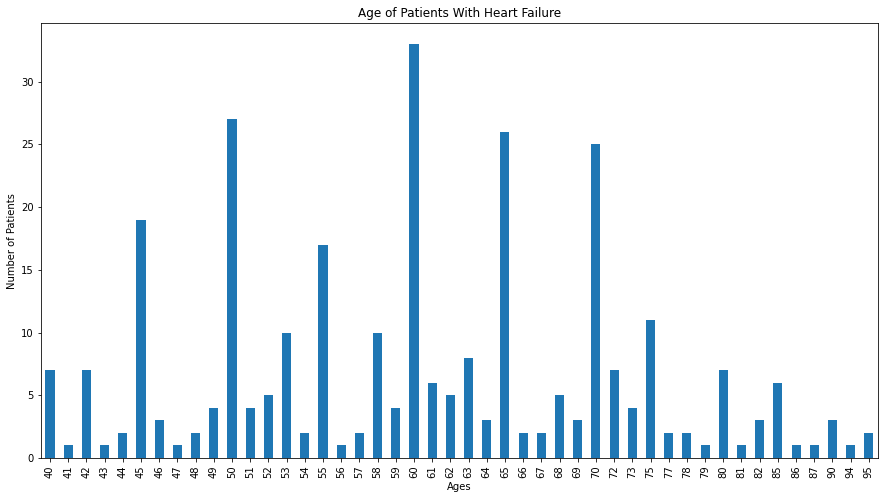

In [ ]:
#converts all values to float before rounding to nearest 'one' (so no decimals) before converting to int (which is to get rid of the decimal)
df['age'] = df['age'].astype('float').round(0).astype('int32')

display(df['age'].value_counts().sort_index().plot.bar(figsize=(15,8)))
plt.title("Age of Patients With Heart Failure")
plt.xlabel("Ages")
plt.ylabel("Number of Patients")

Now, all of the values under column 'age' should be integers. As shown on the graph, the most common age of patients that suffered from a heart failure is 60 years old. However, there is no concrete age range of heart failure patients other than the group between (and including) 45 - 70 with each major group of patients being multiples of 5.

### Is there a common illness amongst those who experience heart failure?

0      0
1      0
2      0
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: anaemia, Length: 299, dtype: object

<AxesSubplot:ylabel='anaemia'>

Text(0, 0.5, 'Number of Patients')

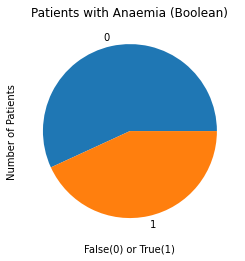

In [ ]:

##These are the conditions we are observing: anaemia, diabetes, and high blood pressure.

display(df['anaemia']) #Values of this column are not of type integer or boolean. We need to convert these values in order to plot it.

df['anaemia'] = df['anaemia'].astype('int32')
display(df['anaemia'].value_counts().plot.pie())

plt.title("Patients with Anaemia (Boolean)")
plt.xlabel("False(0) or True(1)")
plt.ylabel("Number of Patients")

#NOTE: The following couple of graphs is practically a copy and paste of this.



<AxesSubplot:ylabel='diabetes'>

Text(0, 0.5, 'Number of Patients')

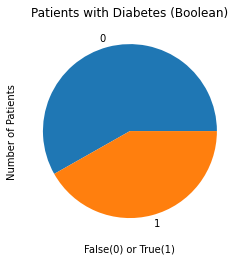

In [ ]:
#All of the values in the mentioned conditions have a different type, so we will have to convert it.
df['diabetes'] = df['diabetes'].astype('int32') 
display(df['diabetes'] .value_counts().plot.pie())

plt.title("Patients with Diabetes (Boolean)")
plt.xlabel("False(0) or True(1)")
plt.ylabel("Number of Patients")

<AxesSubplot:ylabel='high_blood_pressure'>

Text(0, 0.5, 'Number of Patients')

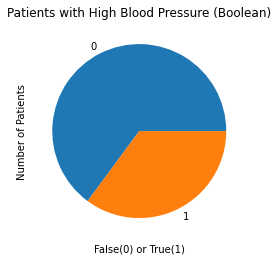

In [ ]:

#Almost the same as above.
df['high_blood_pressure'] = df['high_blood_pressure'].astype('int32') 
display(df['high_blood_pressure'] .value_counts().plot.pie())

plt.title("Patients with High Blood Pressure (Boolean)")
plt.xlabel("False(0) or True(1)")
plt.ylabel("Number of Patients")

As we can see from these graphs, the majority of the patients seemingly do not have these conditions by itself, but not by much. We wonder how many patients have a combination of conditions in this dataset.

<AxesSubplot:xlabel='anaemia,diabetes,high_blood_pressure'>

Text(0, 0.5, 'Number of Patients')

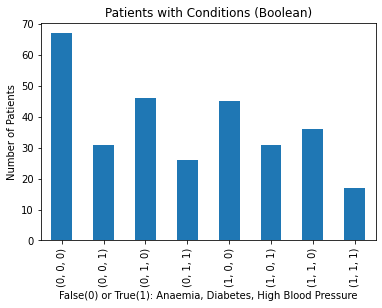

In [ ]:
#using groupby to store data like a tree.
df_ills = df.groupby(['anaemia', 'diabetes', 'high_blood_pressure']).size() #size() and count() can be used interchangably here as there are no null values.

#displays a graph of each possible combination of illnesses/conditions.
display(df_ills.plot.bar())

plt.title("Patients with Conditions (Boolean)")
plt.xlabel("False(0) or True(1): Anaemia, Diabetes, High Blood Pressure")
plt.ylabel("Number of Patients")

As seen from the above graph, the majority of the patients do not have any combination of conditions but it does seem that most of the patients overall does have some condition of some kind (albeit there is a variety of combinations of these conditions). Now, let us check how much people are without any condition vs those who have some condition.

<AxesSubplot:ylabel='None'>

Text(0.5, 1.0, 'Patient Condition Status (based on conditions in dataset)')

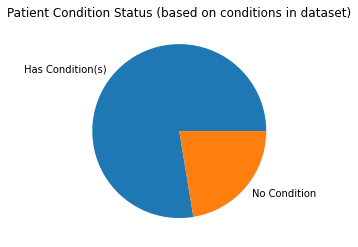

In [ ]:
#we are plotting patients with no condition and patients with some combination of conditions on a pie chart.


sum_cond = df_ills.iloc[1:].sum() #sums everything but the very first row (which we know is patients with no condition)
no_cond = df_ills[0,0,0] #the first row mentioned above


index = ['Has Condition(s)', 'No Condition']
cond1 = pd.Series(sum_cond)
cond2 =  pd.Series(no_cond)


cond = cond1.append(cond2, ignore_index=True) #combining the series together in order to plot it
# display(cond)
cond.index = ['Has Condition(s)', 'No Condition'] #changing index for better understanding
display(cond.plot.pie())
plt.ylabel('')
plt.title('Patient Condition Status (based on conditions in dataset)')

This graph does support my earlier statement of there being fewer patients who have no conditioned mentioned on the dataset than patients with some combination of conditions. We wonder how much of a factor this poses on the risk of getting heart failure.

### Is there any outliers in platelets?

<AxesSubplot:>

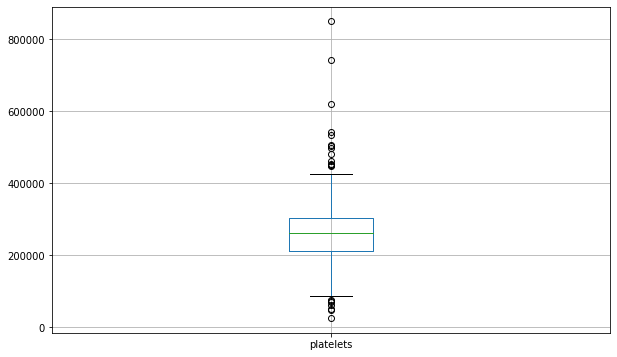

In [ ]:
#For those that do not know, platelets are these blood cells that help blood clot so having too many or too little is a bad sign.
#Platelets can also cause clogs in the arteries of the heart, which raises the risk of a heart stroke.

plt.figure(figsize=(10,6))
df['platelets'] = df['platelets'].astype(float)
display(df.boxplot(column='platelets'))



Interestingly, all of the platelets of every patient are outliers which also within the ranges of thrombocytopenia (low blood platelet count) and thrombocytosis 
(high blood platelet count). It hints at the possibility of heart failure being related to platelet count.

### Is heart failure more common in men or women or neither?

Females consists of 35.12% of the patients while males consists of 64.88% of the patients.
The difference between them is 29.77%.


<AxesSubplot:ylabel='sex'>

Text(0, 0.5, 'Number of Patients')

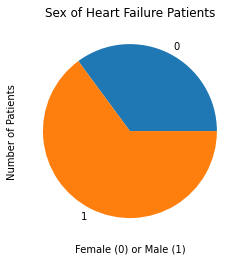

In [ ]:
#Sex in the dataset is only binary with 0 being female and 1 being male.
df_sex = df['sex'].value_counts().sort_values()

total_patients = df_sex.sum()
total_female_perc = df_sex[0]/total_patients

total_male_perc = df_sex[1]/total_patients

print("Females consists of {:.2%} of the patients while males consists of {:.2%} of the patients.".format(total_female_perc, total_male_perc))
print("The difference between them is {:.2%}.".format(abs(total_female_perc-total_male_perc)))


display(df_sex.plot.pie())
plt.title("Sex of Heart Failure Patients")
plt.xlabel("Female (0) or Male (1)")
plt.ylabel("Number of Patients")



From the graph, we can see that more heart failure patients are males than females (although not overwhelmingly), showing that males might be at more risk of heart failure than females.

### Among the patients, what is the common age of death due to heart failure?

<AxesSubplot:>

Text(0, 0.5, 'Number of people')

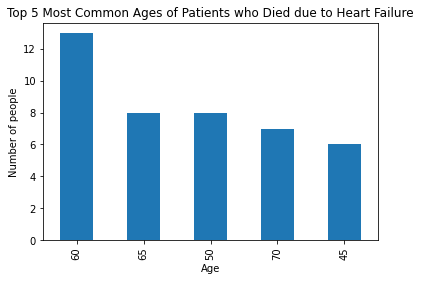

In [ ]:

#common age of death due to heart failure
df_hs = df[df['DEATH_EVENT'] == '1'] #uses boolean indexing to find the data of patients who died

df_hs
s_age = df_hs['age'].sort_values().value_counts()



#plots top 5 most affected ages
display(s_age[:5].plot.bar())

# labelling axes
plt.title('Top 5 Most Common Ages of Patients who Died due to Heart Failure')
plt.xlabel('Age')
plt.ylabel('Number of people')


From the above graph, we can see that the top 5 common ages of heart failure patients who died are slightly different from a previously related graph. This raises the question if the trend would be the same for sex.

Females consists of 35.42% of the patients while males consists of 64.58% of the patients.
The difference between them is 29.17%.


<AxesSubplot:ylabel='sex'>

Text(0, 0.5, 'Number of Patients')

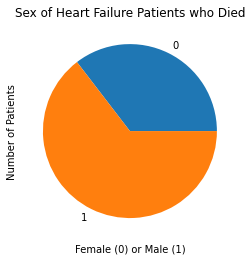

In [ ]:
#We have to store the data with one where DEATH_EVENT is true and slightly change the code from before. 
df_hsex = df_hs['sex'].value_counts().sort_values()


total_p = df_hsex.sum()
total_fpercent = df_hsex[0]/total_p

total_mpercent = df_hsex[1]/total_p

print("Females consists of {:.2%} of the patients while males consists of {:.2%} of the patients.".format(total_fpercent, total_mpercent))
print("The difference between them is {:.2%}.".format(abs(total_fpercent - total_mpercent)))

display(df_hsex.plot.pie())
plt.title("Sex of Heart Failure Patients who Died")
plt.xlabel("Female (0) or Male (1)")
plt.ylabel("Number of Patients")

Although this pie chart is based on the data of the patients of died, it seems the ratio of female to male patients remained the same implying that males are more likely to die from heart failure as well, although you also have to remind yourself that there are more male patients than female patients which could be factor to why it seems like there are more male deaths than female deaths.

### Is there a level of 'Creatinine Phosphokinase' that causes (or more likely causes) death?

<AxesSubplot:xlabel='death', ylabel='creatinine_phosphokinase'>

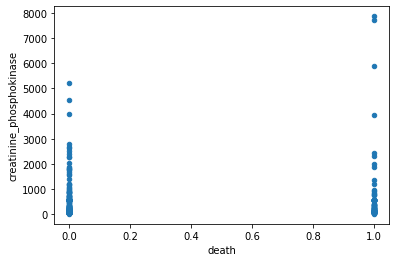

In [ ]:
#Creating new DateFrame for convenience 
df3 = pd.DataFrame(df['creatinine_phosphokinase'].astype(int))
df3['death'] = df['DEATH_EVENT'].astype(int)

df3.plot.scatter(x='death', y='creatinine_phosphokinase')

Although high creatinine phosphokinase does relate to heart attacks and heart stress, it seems there are also patients who have had extreme levels of creatinine phosphokinase and survived, which is an interesting insight. However, it also seems like there are patients who have died from much lower creatinine phosphokinase (although more likely still higher than normal) which raises the question of the level they had died at.

<AxesSubplot:xlabel='death', ylabel='creatinine_phosphokinase'>

Text(0.5, 1.0, 'Death vs Creatinine Phosphokinase')

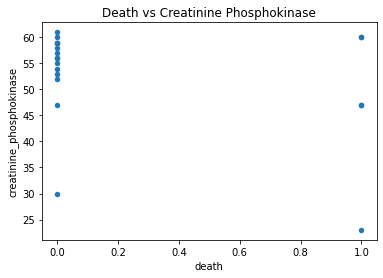

In [ ]:
display(df3.sort_values(by='creatinine_phosphokinase').iloc[0:20].plot.scatter(x='death', y='creatinine_phosphokinase'))
#Remember that death is false if 0 and true is 1!

plt.title('Death vs Creatinine Phosphokinase')

Suprisingly, there are patients who have died from levels of Creatinine Phosphokinase that would be considered safe. We wonder if there are seperate issues that was not included in the dataset that likely caused the deaths of these patients.


### Which attribute(s) have the highest correlation with heart failure?

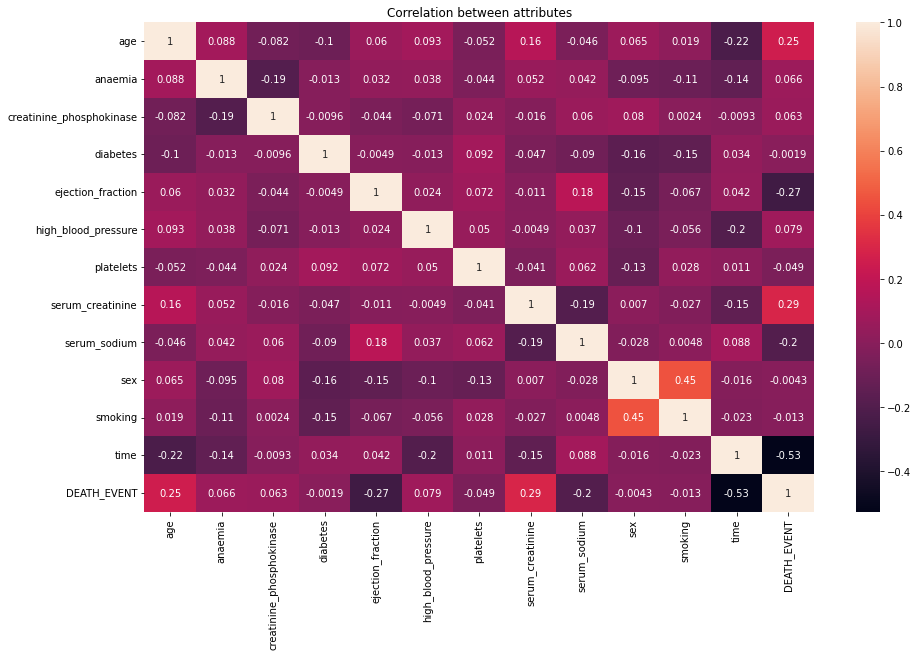

In [ ]:
# converting object data types into numerical data types for each attribute

df['age'] = df.age.astype(float) # must use float type due to 60.667 age value
df['DEATH_EVENT'] = df.DEATH_EVENT.astype(int)
df['anaemia'] = df.anaemia.astype(int)
df['creatinine_phosphokinase'] = df.creatinine_phosphokinase.astype(int)
df['diabetes'] = df.diabetes.astype(int)

df['ejection_fraction'] = df.ejection_fraction.astype(int)
df['high_blood_pressure'] = df.high_blood_pressure.astype(int)
df['platelets'] = df.platelets.astype(float)
df['serum_creatinine'] = df.serum_creatinine.astype(float)
df['serum_sodium'] = df.serum_sodium.astype(int)

df['sex'] = df.sex.astype(int)
df['smoking'] = df.smoking.astype(int)
df['time'] = df.time.astype(int)

df.corr() # print out correlation between each attribute

# graphing correlations
plt.figure(figsize=(15,9))
plt.title('Correlation between attributes')
sns.heatmap(df.corr(), annot=True);




By analyzing the given chart we can answer if there is correlation between patients who smoke and heart failure, correlation between diabetes and heart failure and question seven. A negative correlation represents an inversely proportional relatioship, therefore as a value increases the other decreases. This point is relevant because the correlation between heart failure (DEATH_EVENT) and diabetes is -0.0019 and the correlation between heart failure and smoking is -0.0126. However, this value is extremely small so we cannot truly say that the two are correlated. 

We can also conclude that the attribute with the most significant negative correlation with heart failure is time with a value of -0.53. So, as more time passed in between check-ups, the number of patients who died was low. 

Overall, the correlation between the attributes were relatively low. There weren't any extremly high or extremely low correlations.

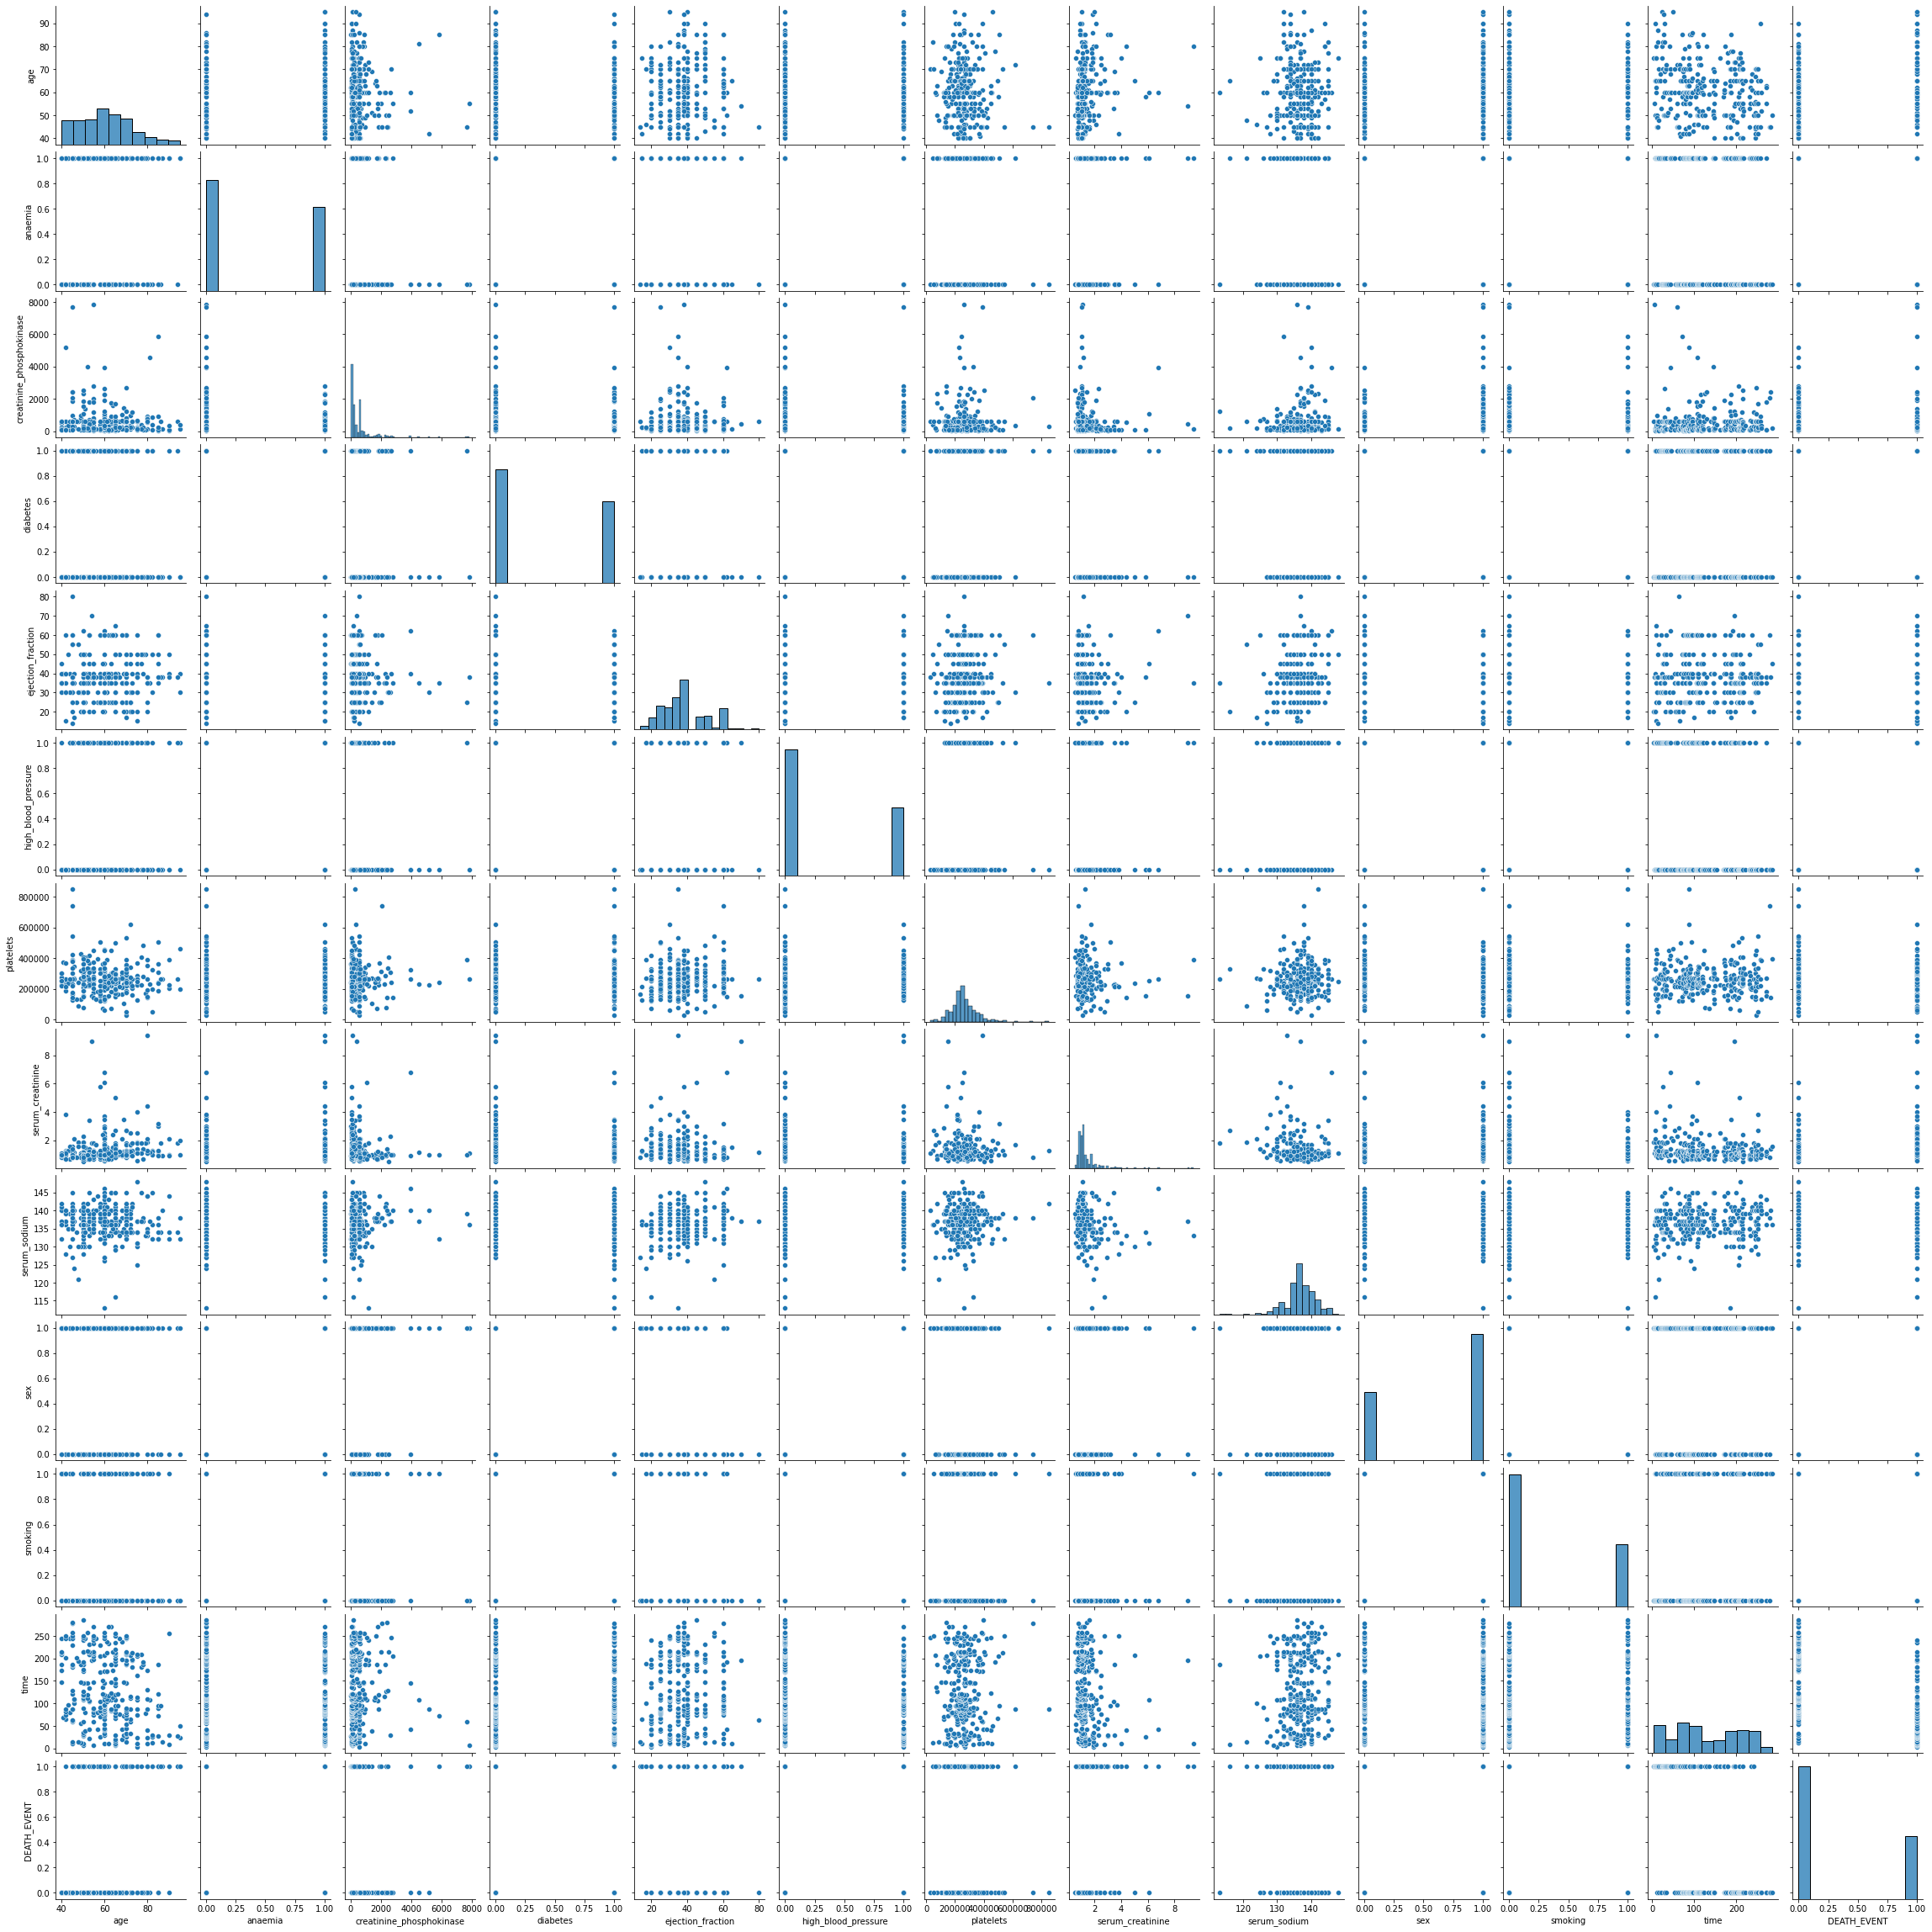

In [ ]:
q = sns.pairplot(data=df)
print(q)

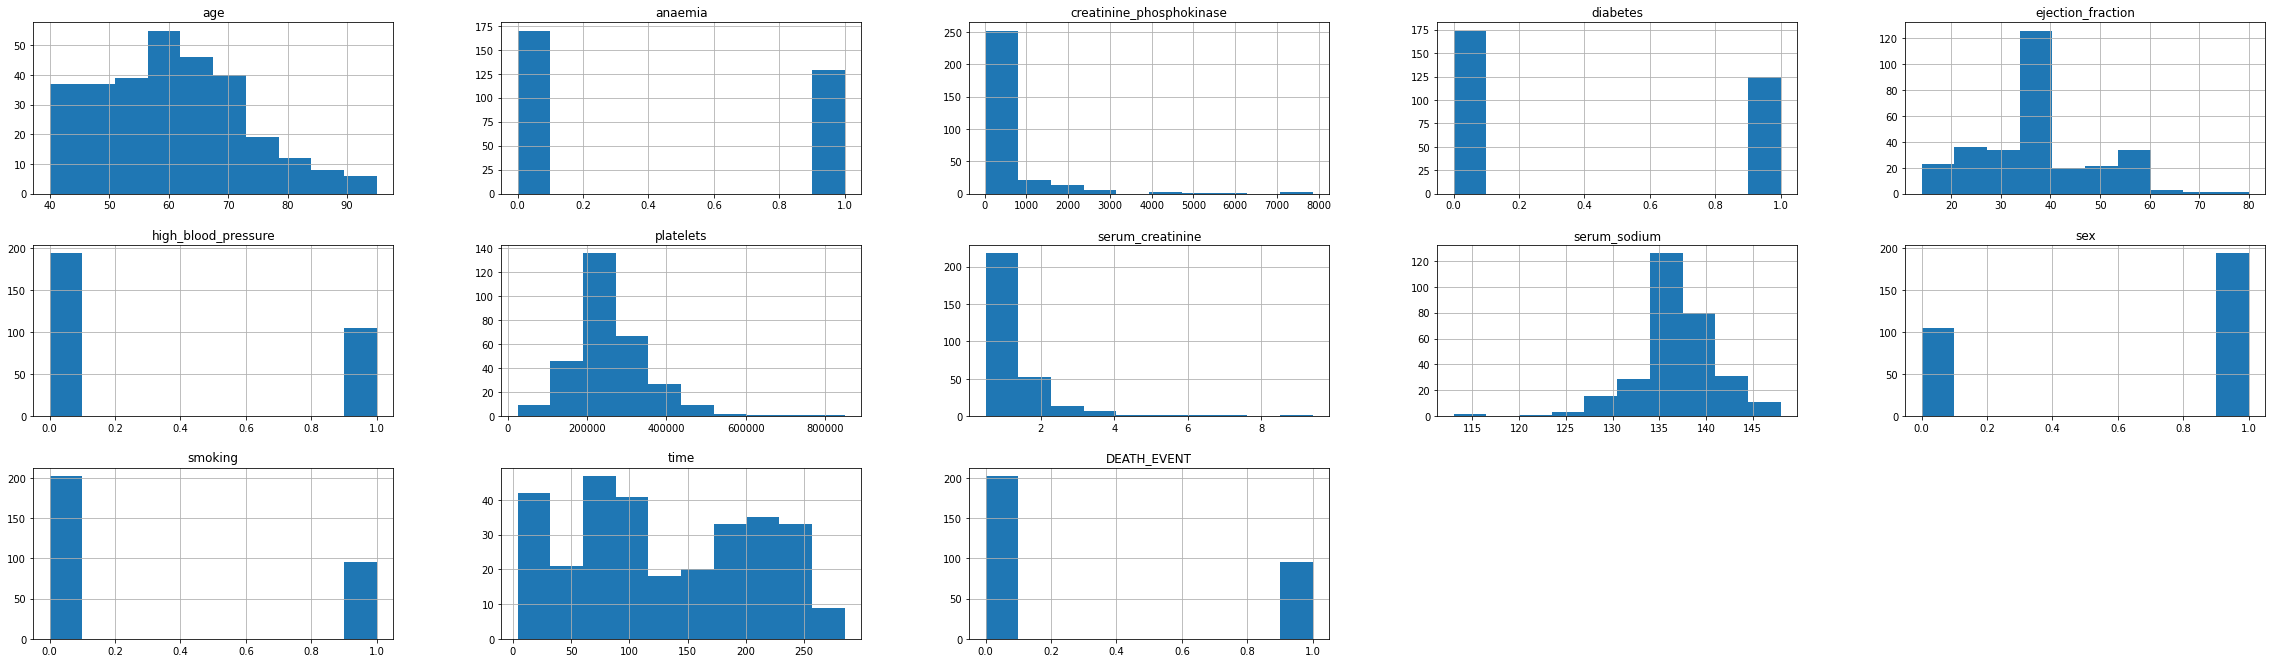

In [ ]:
df.hist(figsize=(40,40), layout=(10,5));

Above we have displayed histograms for each attribute. Up to this point we have displayed most of this data already with other graphs (bar graphs, pie charts etc). New information here would be seen in the ejection fraction histogram. An average percentage of ejection fraction is between 50% to 75%. As you can see,the majority of patients are below this threshold (majority residing at 35% to 40%). This makes sense seeing as all the patients have heart failure.

### Potential Data Science

If we were to pursue a data science or machine learning project using this dataset, we would find it most useful in predicting when a patient with a heart disease may suffer a fatal heart attack or it could be used as a general information guide for the public so to inform them of what to be aware of in people with heart diseases. Going back to our first point, predicting heart failure, in this data set our most vital pieces of information were the types of people most at risk of heart failure and indicators that heart failure will occur. That is, older males are more at risk than females. Additionally, high levels of creatinine phosphokinae (CPK) are well established inidcators that, in this context, a patients heart has undergone much stress. However we did find that this is not always true, so caution should be taken.

### Conclusions

After analyzing our data set we can conclude the following; heart failure is most common in male patients opposed to female patients and more prevalent in the patients who are 60 years old and overall older (45 to 70 years old). To our surprise, the number of patients with some combination of diabetes, anaemia, or high blood pressure are similar in number to the patients with one of those conditions. Although the total number of patients with conditions outnumber the healthier ones by a large margin. We had expected a specific illness to be dominant amongst the patients. Since this is not the case, we can assume that each illness plays an equal role in heart failure.

Some limitations in our data arose in the usability of certain attributes. For example, we wanted to plot a CPK vs time graph, however we only had one value of CPK for each patient. Thus we couldn't see the increase/decrease of CPK in the patient's blood over time (this would've helped us to predict whether or not a person was going to undergo a good deal of stress on their heart). Another limitation we had with this dataset is its inherit bias for patients as it only contains the patients with heart failure which does not allow us to check for things such correlation between the patients without heart failure and the patients with it.

Some results we had not expected came from the correlation chart. It was surprising to see that there were nearly no correlations between the different attributes. The strongest ones were between serum creatinine and death event. Serum creatinine tells us what a patient's sodium level is in their bloodstream. Since they are relatively proportional (again, their correlation isn't that strong with a vlau eof 0.29) we can conclude, that as sodium levels increase so does their risk of dying. The next relatively high correlation occured between time and death. As more time passed in between check-up appointments, the amount of deaths also increased.


In the future, we could look more into the correlation between healthy patients and patients with heart failure in order to learn more about the differences and find more correlation as well as additional information that could better explain what we have observed here. Another thing we might want to look into more is how platelets really affect heart failure as seeming all 299 patients had unsafe amount of platelets. 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b67bd8c2-fae4-4cf3-869a-f12afa6891d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>